# Tutorial

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

## Prepare input data

In [2]:
ds_in = xe.util.grid_global(5, 4)
ds_out = xe.util.grid_global(2, 2)
ds_out

<xarray.Dataset>
Dimensions:  (x: 180, x_b: 181, y: 90, y_b: 91)
Coordinates:
    lon      (y, x) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
    lat      (y, x) float64 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 ...
    lon_b    (y_b, x_b) int64 -180 -178 -176 -174 -172 -170 -168 -166 -164 ...
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 -90 ...
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    *empty*

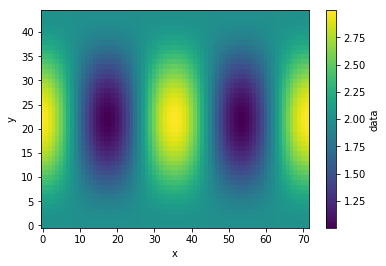

In [3]:
ds_in['data'] = xe.data.wave_smooth(ds_in['lon'], ds_in['lat'])
ds_in['data'].plot()

## Perform regridding

In [4]:
regridder = xe.Regridder(ds_in, ds_out, 'conservative')

Overwrite existing file: conservative_45x72_90x180.nc 
 You can set reuse_weights=True to save computing time.


In [5]:
dr_out = regridder(ds_in['data'])
dr_out

<xarray.DataArray 'data' (y: 90, x: 180)>
array([[ 2.001213,  2.001213,  2.001195, ...,  2.001195,  2.001213,  2.001213],
       [ 2.001225,  2.001233,  2.001201, ...,  2.001201,  2.001233,  2.001225],
       [ 2.010885,  2.010885,  2.010719, ...,  2.010719,  2.010885,  2.010885],
       ..., 
       [ 2.010885,  2.010885,  2.010719, ...,  2.010719,  2.010885,  2.010885],
       [ 2.001225,  2.001233,  2.001201, ...,  2.001201,  2.001233,  2.001225],
       [ 2.001213,  2.001213,  2.001195, ...,  2.001195,  2.001213,  2.001213]])
Coordinates:
    lon      (y, x) float64 -179.0 -177.0 -175.0 -173.0 -171.0 -169.0 -167.0 ...
    lat      (y, x) float64 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 -89.0 ...
Dimensions without coordinates: y, x

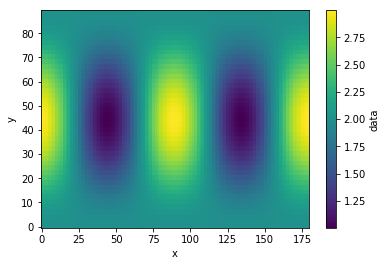

In [6]:
dr_out.plot()